# Лабораторная работа №2

### РЕШЕНИЕ КРАЕВЫХ ЗАДАЧ. МЕТОДЫ КОЛЛОКАЦИЙ, НАИМЕНЬШИХ КВАДРАТОВ И ГАЛЕРКИНА ###

Задание 1) 
$$\begin{eqnarray}
y'' &+& (1 &+& x^2)y &=& -1 \\
\end{eqnarray}$$
Задание 2)
$$ay'' + (1 + bx^2)y = -1 $$
Исходные данные:
$$a = \sin(k)$$
$$b = \cos(k), $$
где $k = 13$ - номер варианта.


  Краевые условия: $$y(1) = 0 $$ $$y(-1) = 0 $$

Базисную систему выбрать в виде;
    $$  \varphi_{i}(x) = x^i(1-x^2) ,  i = 0..N $$
    $$ \varphi_{1}(0) = 0 $$
    $$ \varphi_{0}(x) = 1-x^2 $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
phi = lambda x, i : x ** i * (1 - x ** 2) 

def phi_dd(x, i):
    if i < 2:
        return -(i + 2) * (i + 1) * x ** i
    return (i-1) * i * x ** (i-2) - (i + 2) * (i + 1) * x ** i

## Метод коллокаций

In [3]:
def collocation_method(n, a, b):
    x0 = -1
    xn = 1
    h = (xn - x0)/(n)
    
    X = np.arange(x0, xn + h, h)
    
    Q = lambda x: (1 + b * x ** 2) / a
    
    matrix = np.array([[phi_dd(x, i) + Q(x) * phi(x, i) for i in range(n + 1)] for x in X])
    col = -np.ones(n + 1) / a
    alpha = np.linalg.solve(matrix, col)
    
    f = lambda x: sum([alpha[i] * phi(x, i) for i in range(n + 1)])
    Y = [f(x) for x in X]
    return X, Y

Задание 1.

In [10]:
%%time
X, Y = collocation_method(100, 1, 1) 

CPU times: user 153 ms, sys: 34.6 ms, total: 187 ms
Wall time: 129 ms


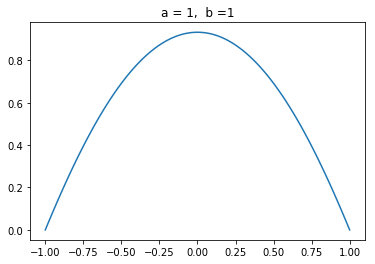

In [8]:
X, Y = collocation_method(100, 1, 1) 
plt.plot(X, Y)
plt.title('a = 1,  b =1')
plt.show()

Задание 2.

In [11]:
%%time
X, Y = collocation_method(100, math.sin(13), math.cos(13)) 

CPU times: user 88 ms, sys: 36.8 ms, total: 125 ms
Wall time: 66.6 ms


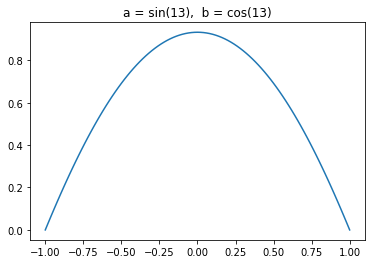

In [12]:
plt.plot(X, Y)
plt.title('a = sin(13),  b = cos(13)')
plt.show()

## Метод МНК

In [13]:
def lsm_method(n, a, b):
    x0 = -1
    xn = 1
    m = n + 10
    h = (xn - x0)/(m)

    X = np.arange(x0, xn + h, h)

    Q = lambda x: (1 + b * x ** 2) / a
    
    #psi[i][j] = psi_j(x_i)
    psi = np.array([[phi_dd(X[i], j) + Q(X[i]) * phi(X[i], j) for j in range(n)] for i in range(m)])

    matrix_member = lambda j, k:  sum([psi[i][j] * psi[i][k] for i in range(m)])
    
    matrix = np.array([[matrix_member(j, k) for k in range(n)] for j in range(n)])
    col = -np.array([sum([psi[i][j] for i in range(m)]) for j in range(n)]) / a
    
    alpha = np.linalg.solve(matrix, col)
    f = lambda x: sum([alpha[i] * phi(x, i) for i in range(n)])
    Y = [f(x) for x in X]
    
    return X, Y

Задание 1.

In [14]:
%%time
X, Y = lsm_method(100, 1, 1)

CPU times: user 639 ms, sys: 45 ms, total: 684 ms
Wall time: 619 ms


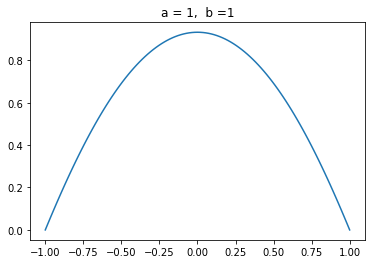

In [15]:
X, Y = lsm_method(100, 1, 1)
plt.plot(X, Y)
plt.title('a = 1,  b =1')
plt.show()

Задание 2.

In [16]:
%%time
X, Y = lsm_method(100, math.sin(13), math.cos(13)) 

CPU times: user 653 ms, sys: 20.9 ms, total: 674 ms
Wall time: 611 ms


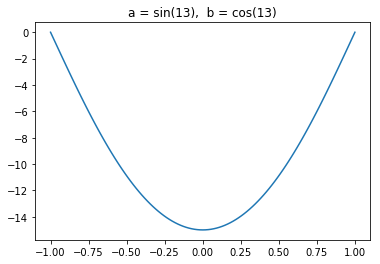

In [17]:
X, Y = lsm_method(100, math.sin(13), math.cos(13)) 
plt.plot(X, Y)
plt.title('a = sin(13),  b = cos(13)')
plt.show()

## Метод Галёркина

In [56]:
def galerkin_method(n, a, b):
    x0 = -1
    xn = 1
    
    #N - number of x for integration points
    N = 100
    h = (xn - x0)/N
    
    #X = np.arange(x0, xn + h, h)
    X = [x0 + i*h for i in range(N+1)]
    
    Q = lambda x: (1 + b * x ** 2) / a
    
    matrix_member = lambda i, j: np.trapz([(phi_dd(x, j) + (1 + b * x ** 2) / a * phi(x, j)) * phi(x, i) for x in X], dx=h)

    matrix = np.array([[matrix_member(i, j) for j in range(n)] for i in range(n)])
    col = -np.array([np.trapz([phi(x, i) for x in X], dx=h) for i in range(n)]) / a
    
    alpha = np.linalg.solve(matrix, col)
    
    f = lambda x: sum([alpha[i] * phi(x, i) for i in range(n)])
    Y = [f(x) for x in X]
    return X, Y

Задание 1.

In [57]:
%%time
X, Y = galerkin_method(100, 1, 1) 

CPU times: user 1.26 s, sys: 16.2 ms, total: 1.28 s
Wall time: 1.25 s


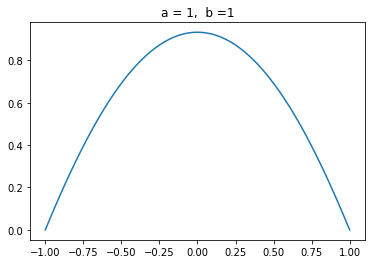

In [58]:
X, Y = galerkin_method(100, 1, 1) 
plt.plot(X, Y)
plt.title('a = 1,  b =1')
plt.show()

Задание 2.

In [59]:
%%time
X, Y = galerkin_method(100, math.sin(13), math.cos(13)) 

CPU times: user 1.26 s, sys: 12.2 ms, total: 1.27 s
Wall time: 1.25 s


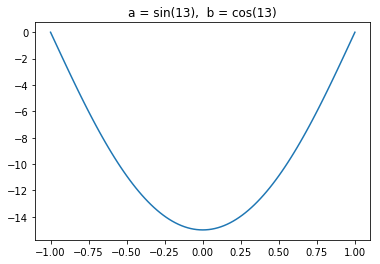

In [60]:
X, Y = galerkin_method(100, math.sin(13), math.cos(13)) 
plt.plot(X, Y)
plt.title('a = sin(13),  b = cos(13)')
plt.show()